### Visualize the results of applying the whole pipeline to a video frame

#### Environment preparation

In [1]:
# Montowanie Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Przejście do katalogu głównego
%cd /content

# Klonowanie repo
!rm -rf automatic-pain-recognition

print(f"Obecne położenie: {os.getcwd()}")

/content
Obecne położenie: /content


In [3]:
# Upewnij się, że nazwa użytkownika i repozytorium są poprawne
USERNAME = 'alicka33'
REPO_NAME = 'automatic-pain-recognition'

# Tworzenie poprawnego adresu URL (format: https://<TOKEN>@github.com/...)
REPO_URL = f"https://github.com/{USERNAME}/{REPO_NAME}.git"

print("Rozpoczynam klonowanie...")

# Klonowanie
!git clone {REPO_URL}

# Wejście do katalogu
%cd $REPO_NAME

Rozpoczynam klonowanie...
Cloning into 'automatic-pain-recognition'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 143 (delta 53), reused 115 (delta 27), pack-reused 0 (from 0)
Receiving objects: 100% (143/143), 7.95 MiB | 16.68 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/automatic-pain-recognition


In [4]:
# Instalacja wymaganych bibliotek
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [4]:
import sys
import os

# Dodaj katalog główny projektu do ścieżki systemowej
sys.path.append(os.getcwd())
print(f"Dodano do ścieżki Pythona: {os.getcwd()}")

Dodano do ścieżki Pythona: /content/automatic-pain-recognition


#### MediaPipe Compatibility Fix (Python 3.12+ / January 2026)
Note: Since the Google Colab update in early 2026, MediaPipe has changed its package structure. If you encounter AttributeError: module 'mediapipe' has no attribute 'solutions' or ModuleNotFoundError, please run the two cells below.

In [ ]:
# 1. Czyszczenie starego bałaganu
!pip uninstall -y mediapipe
!rm -rf /usr/local/lib/python3.12/dist-packages/mediapipe

# 2. Instalacja wersji zgodnej z 3.12 (bez cache)
!pip install --no-cache-dir mediapipe==0.10.14

# 3. WYMUSZENIE RESTARTU - to zabije sesję i odświeży ścieżki
import os
os.kill(os.getpid(), 9)

Found existing installation: mediapipe 0.10.31
Uninstalling mediapipe-0.10.31:
  Successfully uninstalled mediapipe-0.10.31
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 224.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.


#### Testing processing pipeline through visualization

In [5]:
import os
from data_preparation.processing_pipeline_dlib import init_dlib, video_to_landmark_vectors as dlib_video_to_vectors
from data_preparation.processing_pipeline_mediapipe import load_reference_keypoints, video_to_feature_sequences as mp_video_to_feature_sequences

In [6]:
COLAB_ROOT = '/content/drive/MyDrive/PainRecognitionProject/'
VIDEO_SAMPLE_PATH = os.path.join(COLAB_ROOT, 'data/BioVid_HeatPain/071309_w_21', '071309_w_21-BL1-081.mp4')

#### Dlib

In [7]:
PREDICTOR_PATH = os.path.join(COLAB_ROOT, 'data', 'shape_predictor_68_face_landmarks.dat')
MEAN_FACE_PATH = os.path.join(COLAB_ROOT, 'data', 'landmarks_mean_face.npy')
WEIGHTS_PATH = os.path.join(COLAB_ROOT, 'data', 'frontalization_weights.npy')

dlib_ctx = init_dlib(PREDICTOR_PATH, MEAN_FACE_PATH, WEIGHTS_PATH)
print("Dlib initialized. Frontalization weights loaded:", dlib_ctx.get('frontalization_weights') is not None)

Dlib initialized. Frontalization weights loaded: True


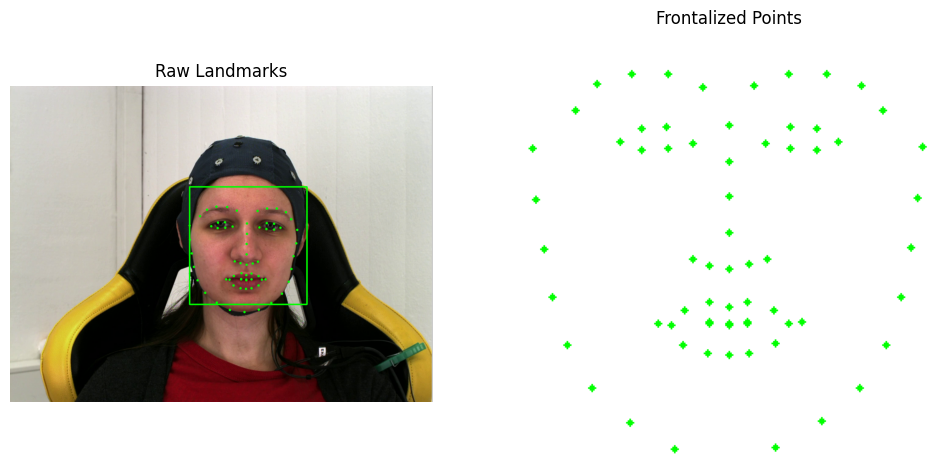

In [8]:
feature_sequence = dlib_video_to_vectors(
        video_path=VIDEO_SAMPLE_PATH,
        detector=dlib_ctx['detector'],
        predictor=dlib_ctx['predictor'],
        aligner=dlib_ctx.get('aligner'),
        frontalization_weights=dlib_ctx.get('frontalization_weights'),
        canonical_reference=dlib_ctx.get('canonical_reference'),
        frame_skip=3,
        frontalize=True,
        visualize=True
    )

#### MediaPipe

In [7]:
mp_ref_kp, mp_ref_ok = load_reference_keypoints(os.path.join(COLAB_ROOT, 'data', 'key_points_xyz.npy'))
print("MediaPipe reference loaded:", mp_ref_ok)

MediaPipe reference loaded: True


/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


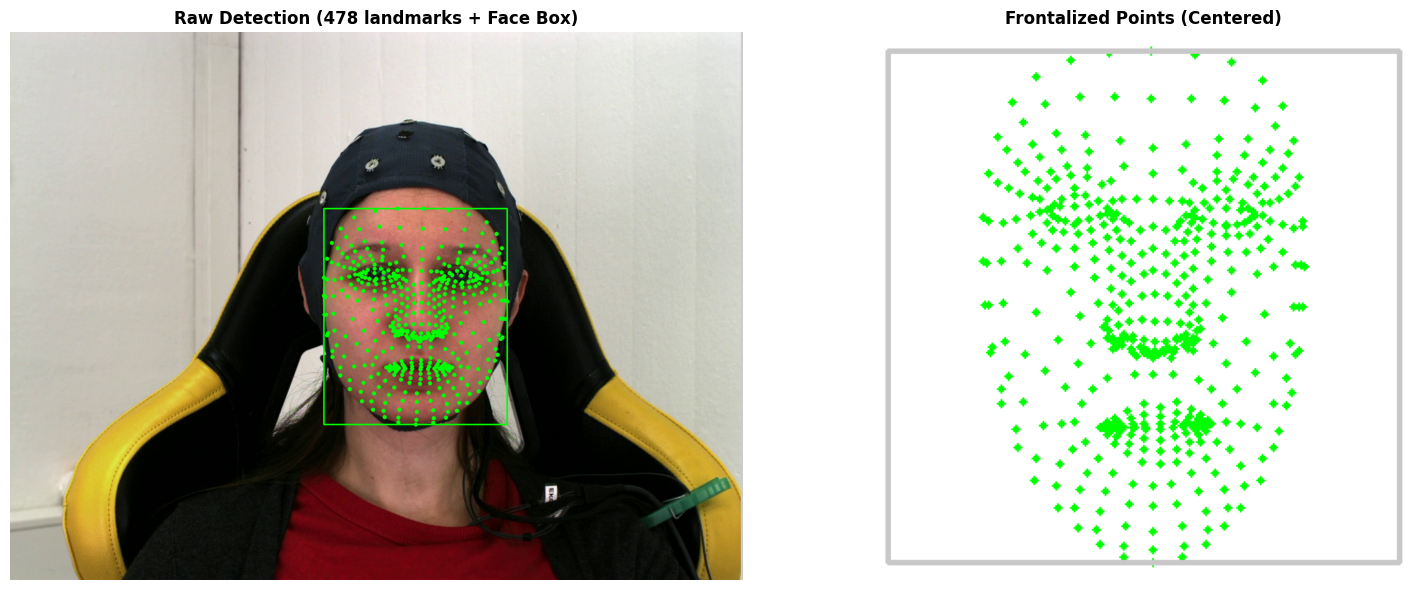

In [8]:
feature_sequence = mp_video_to_feature_sequences(
        video_path=VIDEO_SAMPLE_PATH,
        frame_skip=3,
        reference_keypoints_3d=mp_ref_kp if mp_ref_ok else None,
        use_frontalization=bool(mp_ref_ok),
        visualize=True
    )